___

# Image Colour Detection and Search functionalities using OpenCV

___

## 1. Problem Statement

The objective of this notebook is to use libraries such as numpy and openCV in order to create a model that will help us load in a folder of images and then detect the different colours in that image. Further, we will be able to search images based on colour and have our code return only those images which have that colour in them. To do this, we will use KMeans clustering to detect the different colours where each colour will be represented by the centre of a cluster.

___

## 2. Importing Libraries

In [2]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os

%matplotlib inline

- We will be using KMeans clustering from sklearn in order to identify our colurs.
- We also  use OpenCV to be able to modify and more easily work on the image
- matplotlib will be used to plot a chart with all the different colours we identified.

Shape: (3280, 4928, 3)


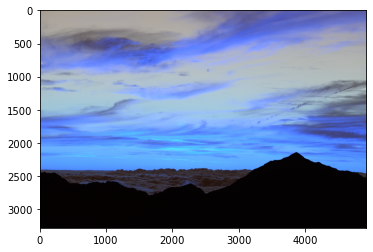

In [3]:
image = cv2.imread('sample_image.jpg')
print("Shape: {}".format(image.shape))
plt.imshow(image)


- Now that we have imported an image, we save it to the variable image. When we import the image in, it is imported in the BGR colorspace.
- Due to this, we will have to convert it into the RGB colorspace first before working on it and to do this we will use the cvtColor() method.

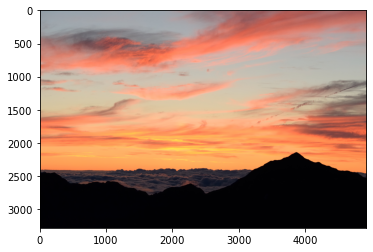

In [5]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

- Our next step will be to resize this image. We could also use the image without resizing it but it would be quicker to resize it first. It will also help reduce the number of colours in the image.
- We will resize it to a (1000,500) image and will continue to run our KMeans algorithm to find our centroids and therefore our different colours.

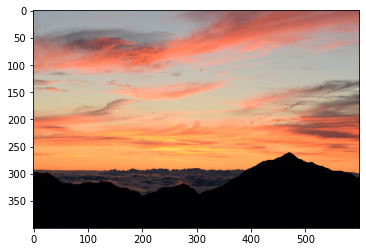

In [6]:
resized_image = cv2.resize(image, (600, 400))
plt.imshow(resized_image)

- Now that we have resized the image, we can continue to define the methods that will be used in order to fetch the image, and further return the colors in that image.

___

## 4. Identifying Colors Within an Image

In [8]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

- The RGB2HEX method returns the hexadecimal code of the color we pass into the method. It returns it as per the format that we have specified in the return statement.

In [9]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

- get_image takes the image path and then reads it into a variable. IT then performs the conversion of the image from BGR into RGB as we  have observed in the beginning of this notebook.
- Both these steps are carried out and the finished image is then returned.

In [42]:
def get_colors(image,number_of_colors,show_chart):
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    #number_of_colors = 5
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    counts = Counter(labels)
    center_colors = clf.cluster_centers_
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]

    #show_chart = True

    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)

    return rgb_colors

- get_colors performs the resizing of the image and then creates a Kmeans clustering model.
- We set the number of colors equal to the number of clusters for our KMeans clustering algorithm.
- After this, we use the fit_predict method to predict on our image. This will create clusters of pixels that have similar values and therefore give us our different clusters.
- We also create 2 lists, one for the hex color values and another with the RGB color values. We will use these lists to create the pie chart later on.
- We also have a list called center_colors which contains a list of the centroids or the center colors of our clusters. This will be the same as the number of colors we want to identify in the image.

[array([151.4017189 , 101.66253508,  96.8921305 ]),
 array([2.04327137, 1.92514837, 4.3896384 ]),
 array([203.23448138, 189.23786043, 171.83695435]),
 array([254.12418371, 157.27787237,  93.62497037]),
 array([54.95913485, 44.75361308, 51.46038074]),
 array([211.44820998, 115.61318383,  94.81360619]),
 array([165.72383404, 158.19802801, 158.78146678]),
 array([236.72832705, 174.1816831 , 142.52674688])]

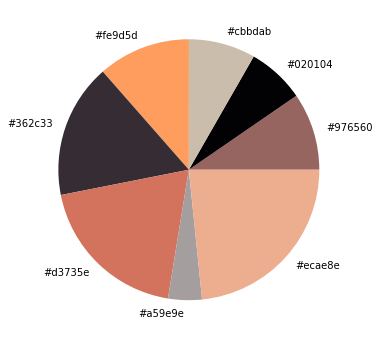

In [43]:
get_colors(get_image('sample_image.jpg'), 8, True)

- We call the get_colors method supplying it our image as well as the number of colors we want to identify.
- Lastly, we also send a True flag which will show the chart or not based on whether the flag is True or False.
- As we can see, the output is an array which contains the RGB values of each of the colors that have been identified as well as a pie chart which shows the different hex values as well as the shades of colors that have been identified along with the amount in which they are present in the image.

___

## 5. Identifying Images Based on Color

In [68]:
IMAGE_DIRECTORY = 'Sample Images'
COLORS = {
    'GREEN': [0, 128, 0],
    'BLUE': [10, 10, 128],
    'YELLOW': [255, 255, 0],
    'RED': [200,0,0]
}
images = []

for file in os.listdir(IMAGE_DIRECTORY):
    if not file.startswith('.'):
        images.append(get_image(os.path.join(IMAGE_DIRECTORY, file)))

- First we define our image directory. This directory has a set of images which we will test for certain particular colors.
- We then create a dictionary called COLORS which has the baseline value for different colors that we want to search for in our images. If we are to define a new color to look for, we would have to introduce a new entry to this list and provide its RGB values.
- Once we define both of these, we iterate through these images and add them to a list called 'images'.

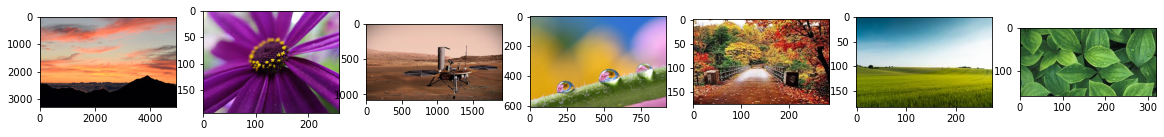

In [52]:
plt.figure(figsize=(20, 10))
for i in range(len(images)):
    plt.subplot(1, len(images), i+1)
    plt.imshow(images[i])

- Above we can see all the pictures in the folder. We will iterate through these images and check if any of them match the color which we have searched for.
- Since we will have many shades of each color, we would need some leeway to allow us to detect shades of color slightly different from the exact color we require to search for.
- We do this with the help of the threshold parameter. This determines how lenient we will be in detecting a color.
- The higher the threshold, the more lenient we will be in identifying say the color blue. 
- On the other hand if we were to have a very low threshold, it would scritcly stick to the RBG values we have defined in the COLORS dictionary.

In [58]:
def match_image_by_color(image, color, threshold = 60, number_of_colors = 10): 
    
    image_colors = get_colors(image, number_of_colors, False)
    selected_color = rgb2lab(np.uint8(np.asarray([[color]])))

    select_image = False
    for i in range(number_of_colors):
        curr_color = rgb2lab(np.uint8(np.asarray([[image_colors[i]]])))
        diff = deltaE_cie76(selected_color, curr_color)
        if (diff < threshold):
            select_image = True
    
    return select_image

- The match_image_by_color method takes in parameters such as the image, the color we are looking for and threshold as well as some others.
- The method first calls the get_colors() method in order to fetch the number of colors specified from the image.
- Next the selected_color takes the color that we are searching for and converts it into a lab format.
- We then iterate and set the current color we are searching for as well as the difference between that color and each color that we have retrieved from the image.
- If the difference we get is less than our threshold value then we select the image and return the select_image flag as a true value.

In [7]:
def show_selected_images(images, color, threshold, colors_to_match):
    index = 1
    
    for i in range(len(images)):
        selected = match_image_by_color(images[i],
                                        color,
                                        threshold,
                                        colors_to_match)
        if (selected):
            plt.subplot(1, 5, index)
            plt.imshow(images[i])
            index += 1

- The above method is used to display the images that have the color present in them.
- To do this we call the match_image_by_color() method for each of the images and see if it returns a true or false flag. Based on this, we will either display or not display these images.

___

__Testing for the color red__

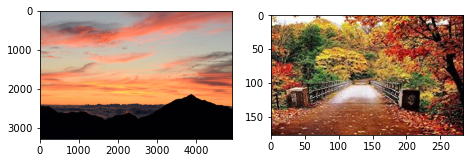

In [70]:
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['RED'], 60, 5)

- As we can see above, we have the two images that contain the color red in them returned to us and displayed as subplots.
- We can do this for other colors as well as long as we define it in the COLORS dictionary.

___

__Testing for the color green__

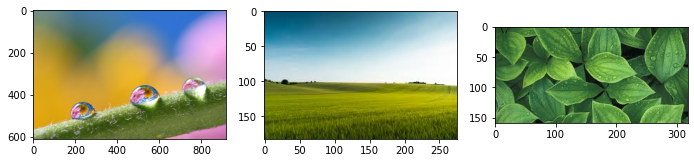

In [71]:
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['GREEN'], 60, 5)

- Similarly we can do the same thing to find all images which contain the color green.

___

## 5. Conclusion

- Starting off, we resize and modify the image so that it is in the format that we require and change its colorspace to make it more easy for us to work with.

- Then we used KMeans clustering in order to determine various colors in a picture. We looked for the centroids of the clusters in order to find these different colors and we were able to plot these results in terms of a pie chart which contained the hex values of the colors along with the extent to which they are present in the image.

- We also created a method to be able to sift through our images and filter them based on the color we were searching for so that we could return all images which contained that color in them.


___